# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

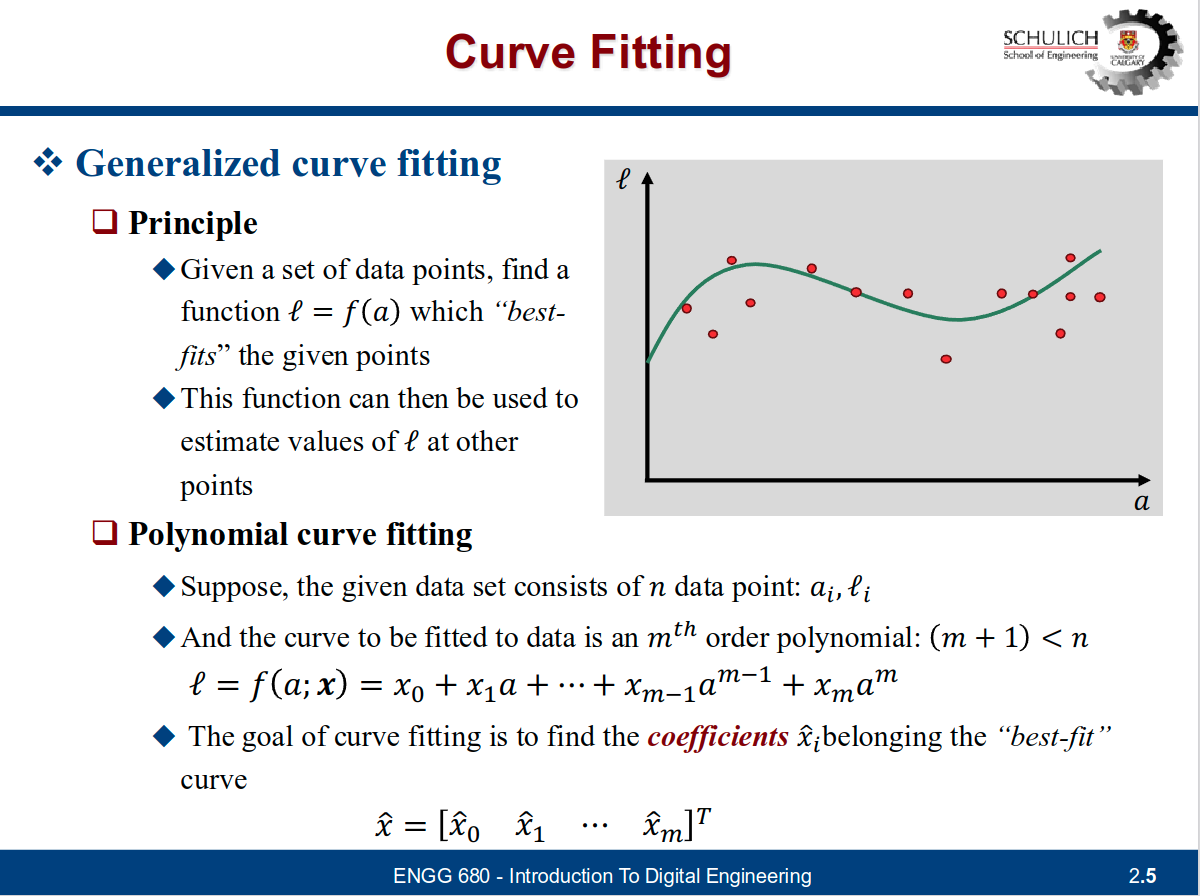

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('https://github.com/SaharYousefi92/engg680_2024_fall/raw/main/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:, 2]

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


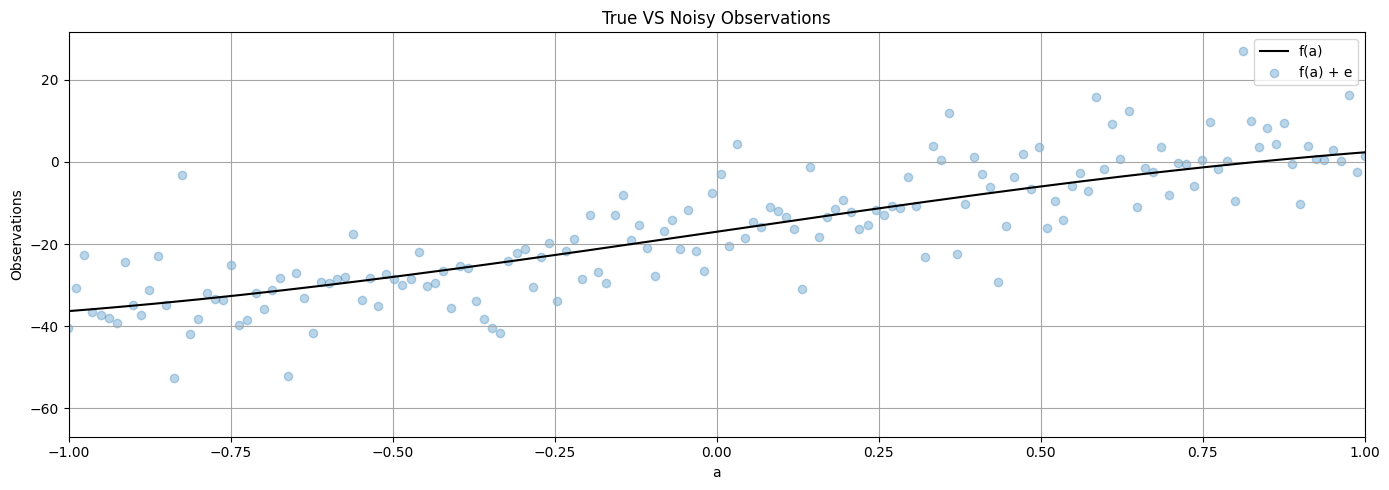

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label='f(a)', color='k')
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_xlim([-1, 1])
ax.legend()
ax.set_title('True VS Noisy Observations')
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()


In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    # 1: Building the design matrix A for the polynomial fit.
    A = np.vander(a, N=deg+1, increasing=True)

    # 2: Applying the weight matrix P to the design matrix and observations
    PA = P @ A
    Pl = P @ l

    # 3: Performing the least squares estimation using the normal equation
    ATA_inv = np.linalg.solve(PA.T @ PA, np.eye(PA.shape[1]))  # Use solve instead of inv
    x = ATA_inv @ (PA.T @ Pl)  # Estimated polynomial coefficients

    # 4: Calculating the residuals
    predicted_l = A @ x  # Predicted values
    v = l - predicted_l  # Residuals

    # 5: Computing the a posteriori variance factor (goodness of fit)
    n = len(l)  # Number of observations
    m = len(x)  # Number of parameters (coefficients)
    apv = (v.T @ P @ v) / (n - m)  # Adjust for degrees of freedom

    # 6: Computing the covariance matrix of the estimated coefficients
    cov_x = ATA_inv * apv  # Covariance matrix scaled by apv

    return x, cov_x, apv, v



In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# degree 1, Linear fit
results = {}
degrees = [1, 3, 5]
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance_matrix': cov_x,
        'apv': apv,
        'residuals': v
    }


In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a)

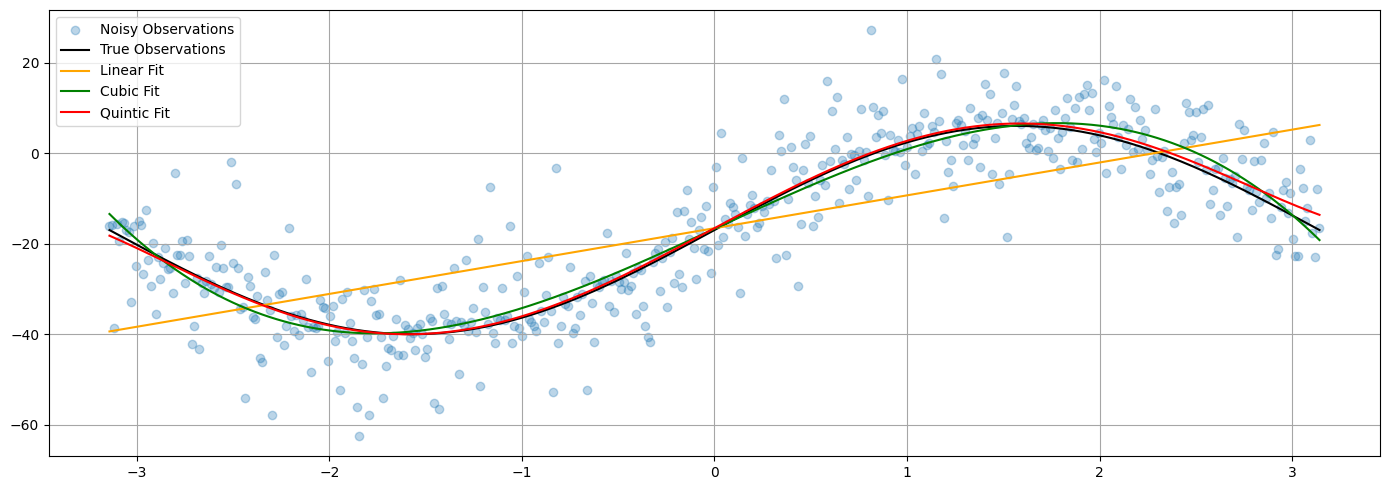

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='True Observations', color='k')
ax.plot(a, line_uw, color='orange', label='Linear Fit')
ax.plot(a, cubic_uw, color='green', label='Cubic Fit')
ax.plot(a, quintic_uw, color='red', label='Quintic Fit')

ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
for deg, res in results.items():
    print(f"Degree {deg} polynomial fit:")
    print(f"A posteriori variance factor: {res['apv']}")
    print("\n")

Degree 1 polynomial fit:
A posteriori variance factor: 162.742608604322


Degree 3 polynomial fit:
A posteriori variance factor: 66.13227783131883


Degree 5 polynomial fit:
A posteriori variance factor: 63.75834463018419




In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
for deg, res in results.items():
    predicted_l = np.polyval(res['coefficients'][::-1], a)
    norm = np.linalg.norm(predicted_l - l_true)
    print(f"Degree {deg} polynomial fit:")
    print(f"Norm between predicted and true observations: {norm}")
    print("\n")


Degree 1 polynomial fit:
Norm between predicted and true observations: 229.06016796744095


Degree 3 polynomial fit:
Norm between predicted and true observations: 38.28597992911667


Degree 5 polynomial fit:
Norm between predicted and true observations: 17.36996719696516




In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# The a posteriori variance factor decreases as the polynomial degree increases, indicating an improvement in the model's fit to the noisy observations. The linear polynomial (Degree 1) has the highest variance factor, suggesting it poorly captures the underlying relationship in the data. In contrast, the cubic (Degree 3) and quintic (Degree 5) polynomials exhibit significantly lower variance factors, indicating they provide better fits. The norms also show a similar trend, with the linear polynomial having the largest norm, followed by the cubic, and the quintic having the smallest norm, further confirming its superior fitting capability.
# And the patter we observed  is as the polynomial degree increases, both the a posteriori variance factor and the norm decrease, demonstrating that higher-degree polynomials better fit the noisy observations.


In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

Degree 1 polynomial fit (Weighted):
A posteriori variance factor: 12.221680577188417
Norm between predicted and true observations: 288.5789976437688


Degree 3 polynomial fit (Weighted):
A posteriori variance factor: 1.1781919297282089
Norm between predicted and true observations: 184.24110709588913


Degree 5 polynomial fit (Weighted):
A posteriori variance factor: 0.9483792305830182
Norm between predicted and true observations: 178.06702562175496




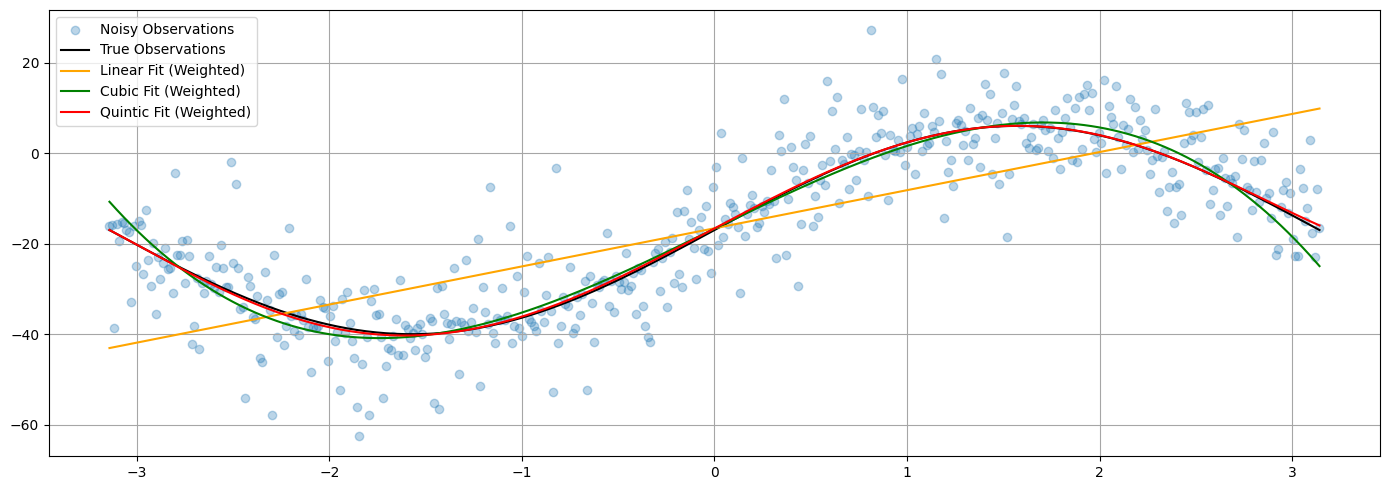

In [31]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
results_weighted = {}
degrees = [1, 3, 5]

P_weighted = np.diag(1 / l_var)

for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P_weighted, deg)
    results_weighted[deg] = {
        'coefficients': x,
        'covariance_matrix': cov_x,
        'apv': apv,
        'residuals': v
    }

line_w = np.polyval(results_weighted[1]['coefficients'][::-1], a)
cubic_w = np.polyval(results_weighted[3]['coefficients'][::-1], a)
quintic_w = np.polyval(results_weighted[5]['coefficients'][::-1], a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='True Observations', color='k')
ax.plot(a, line_w, color='orange', label='Linear Fit (Weighted)')
ax.plot(a, cubic_w, color='green', label='Cubic Fit (Weighted)')
ax.plot(a, quintic_w, color='red', label='Quintic Fit (Weighted)')
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()

for deg, res in results_weighted.items():
    print(f"Degree {deg} polynomial fit (Weighted):")
    print(f"A posteriori variance factor: {res['apv']}")

    predicted_l = np.vander(a, N=deg+1, increasing=True) @ res['coefficients']
    norm = np.linalg.norm(predicted_l - l)
    print(f"Norm between predicted and true observations: {norm}")
    print("\n")



In [32]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# for posterier variance factor, the phenomena we observed is, The weighted LSE tends to produce a smaller posterior variance factor compared to unweighted LSE. This is because weighted LSE compensates for the differences in observation quality, reducing the influence of noisy data, leading to a more reliable estimate.
# whereas for norm the phenomena we observed is, The norm in weighted LSE is generally smaller compared to unweighted LSE. This happens because the algorithm better fits the data by giving more importance to precise measurements and less to noisy ones.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

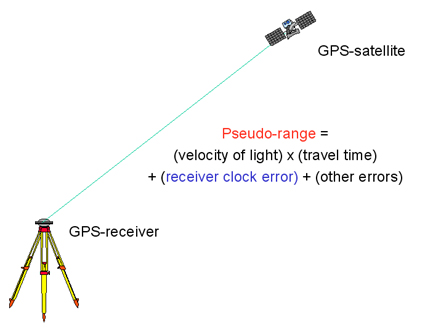

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv


In [49]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('https://github.com/SaharYousefi92/engg680_2024_fall/raw/main/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('https://github.com/SaharYousefi92/engg680_2024_fall/raw/main/Lab_Assignment2/satellite_position.xlsx')
pseudorange = df_pseudorange['P'].to_numpy()
sat_pos = df_sat_pos[['x','y','z']].to_numpy()



In [50]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 4  # 3D position and clock offset


In [51]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [39]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

# Output x_0 to verify
print("Initial state vector x_0:")
print(x_0)

Initial state vector x_0:
[0. 0. 0. 0.]


In [41]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [44]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0


print("Initial corrections array delta:")
print(delta)
print("Iteration loop counter i:", i)
print("Initial estimated state x_hat:")
print(x_hat)

Initial corrections array delta:
[1. 1. 1. 1.]
Iteration loop counter i: 0
Initial estimated state x_hat:
[0. 0. 0. 0.]


In [47]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distance =np.linalg.norm(receiver_pos - satellite_pos, axis=1)
  return distance




In [48]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    n = s_pos.shape[0]
    A = np.zeros((n, 4))
    for i in range(n):
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]
        A[i, 3] = 1
    return A

print("Design matrix A:")
print(A)

Design matrix A:
[[-0.30167384  0.95331954  0.01321905 -1.        ]
 [ 0.02571684  0.85359195 -0.52030705 -1.        ]
 [-0.53594492  0.80630416 -0.25027313 -1.        ]
 [ 0.63306247 -0.34765667 -0.69164062 -1.        ]
 [ 0.56751817  0.82326461  0.0125896  -1.        ]
 [ 0.03128019 -0.77628035 -0.62961129 -1.        ]
 [-0.73676797 -0.00794105 -0.67609903 -1.        ]
 [-0.73650004 -0.1412039  -0.66153545 -1.        ]
 [ 0.82484993  0.16897237 -0.53950989 -1.        ]
 [ 0.57255675 -0.62987535 -0.52481979 -1.        ]
 [ 0.29296618  0.49439632 -0.81837833 -1.        ]]


In [33]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
threshold = 0.001
max_iterations = 100
while np.linalg.norm(delta[:3]) > threshold and i < max_iterations:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.solve(A.T @ P @ A, A.T @ P @ w)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)
       from numpy.linalg import pinv, cond
       if cond(A.T @ P @ A) > 1e10:
         delta = pinv(A.T @ P @ A) @ (A.T @ P @ w)
       else:
         delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)


       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(np.log(np.linalg.norm(w)))
       arr_delta.append(np.log(np.linalg.norm(delta)))
       arr_err_pos.append(np.log(err_pos))
       arr_i.append(i)



# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)
A = design_matrix(x_hat[:3], sat_pos)
try:
  C_x_hat = np.linalg.inv(A.T @ P @ A) * apv
except np.linalg.linAlgError:
  C_x_hat = np.linalg.pinv(A.T @ P @ A) * apv


# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A) * apv




In [25]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print("\n=== Final Results ===")
print("Estimated states: ")
print(x_hat)
print("\n Corrections array: ")
print(delta)
print("\n Residuals (w): ")
print(w)
print("\nA Posteriori Variance of Unit Weight: ")
print(apv)
print("\nCovariance matrix of estimated states: ")
print(C_x_hat)
print("\nNumber of iterations: ")
print(i)
print("\n3D position errors: ")
print(arr_err_pos)



=== Final Results ===
Estimated states: 
[ -1633492.44451686  -3651629.54237942   4952485.43270834
 -19967471.6632473 ]

 Corrections array: 
[ 3.23541462e-06  6.40004873e-06 -1.76131725e-05 -9.98373907e+06]

 Residuals (w): 
[9983739.32761119 9983739.17881808 9983737.96813634 9983739.06264205
 9983739.26795432 9983737.64948254 9983738.97637286 9983740.57973036
 9983739.33129871 9983739.67902384 9983738.72297543]

A Posteriori Variance of Unit Weight: 
156632214782579.1

Covariance matrix of estimated states: 
[[ 5.00674976e+13  1.09113842e+13 -1.32467021e+13  1.14449303e+13]
 [ 1.09113842e+13  6.66421102e+13 -9.10145132e+13  5.76811606e+13]
 [-1.32467021e+13 -9.10145132e+13  3.20407107e+14 -1.72925203e+14]
 [ 1.14449303e+13  5.76811606e+13 -1.72925203e+14  1.09526230e+14]]

Number of iterations: 
5

3D position errors: 
[13.968666725656787, 10.402524015681406, 3.478974383476212, 1.6922395825101475, 1.6922364579863765]


In [26]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

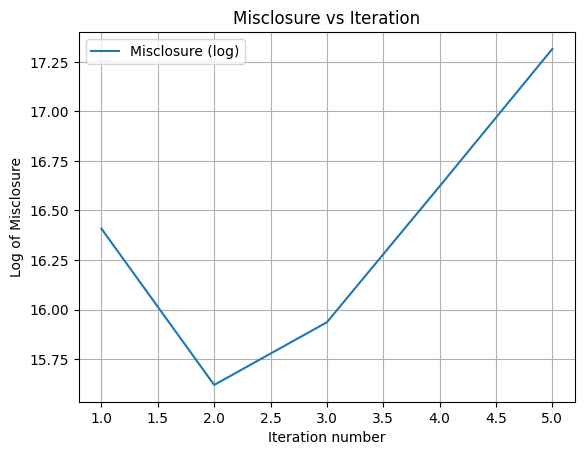

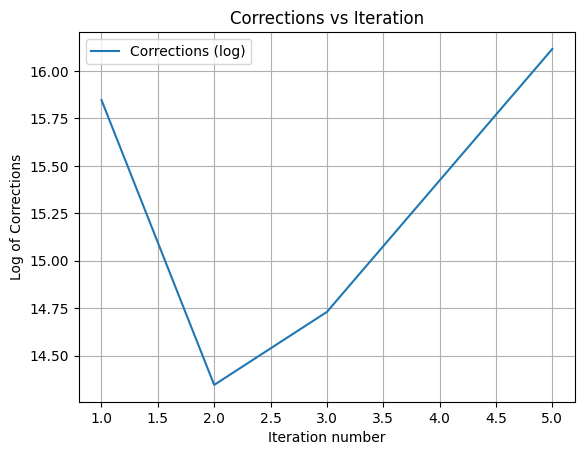

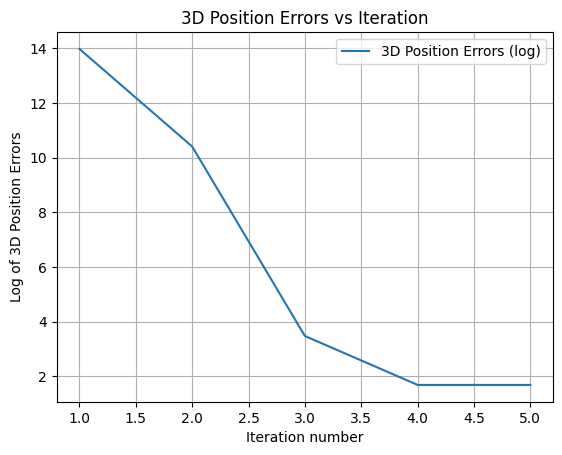

In [27]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, arr_w, label='Misclosure (log)')
plt.xlabel('Iteration number')
plt.ylabel('Log of Misclosure')
plt.title('Misclosure vs Iteration')
plt.grid(True)
plt.legend()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, arr_delta, label='Corrections (log)')
plt.xlabel('Iteration number')
plt.ylabel('Log of Corrections')
plt.title('Corrections vs Iteration')
plt.grid(True)
plt.legend()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, arr_err_pos, label='3D Position Errors (log)')
plt.xlabel('Iteration number')
plt.ylabel('Log of 3D Position Errors')
plt.title('3D Position Errors vs Iteration')
plt.grid(True)
plt.legend()

plt.show()


In [28]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [29]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
